In [92]:
#импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams.update({'font.size': 10})
plt.style.use('seaborn-v0_8-deep')

In [93]:
#считываем датасет с диска
df = pd.read_csv('https://drive.google.com/uc?id=1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###Предобработка и изучение данных

In [94]:
#проверим датасет на наличие пропущенных значений
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [95]:
#проверяем, какого типа у нас ячейки - категориальные или числовые
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [96]:
#так как все столбцы числовые, то посмотрим описательную статистику датасета
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


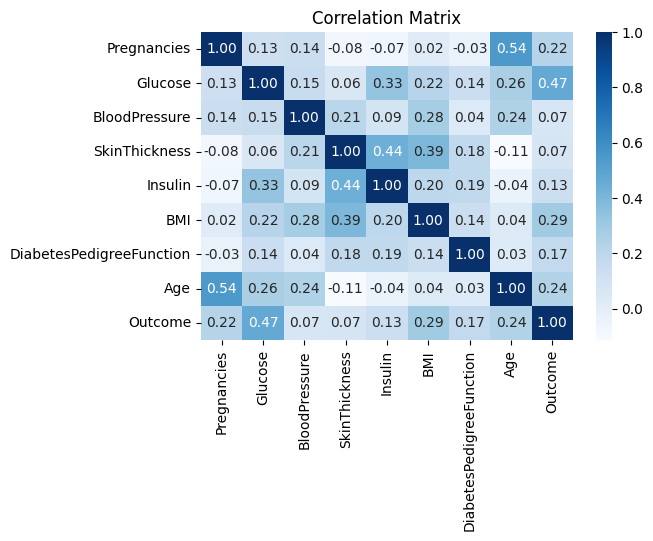

In [97]:
# Вычисление корреляционной матрицы
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

###Понижение размерности

In [98]:
#Выделим признаки и целевую переменную
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [99]:
#Стандартизируем признаки
std = StandardScaler()
X_transformed = std.fit_transform(X)

####PCA

In [100]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

PCA_dataset = pca.fit_transform(X_transformed)

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2'])

PCA_dataset.head()

,PCA_1,PCA_2
0,1.068503,1.234895
1,-1.121683,-0.733852
2,-0.396477,1.595876
3,-1.115781,-1.271241
4,2.359334,-2.184819


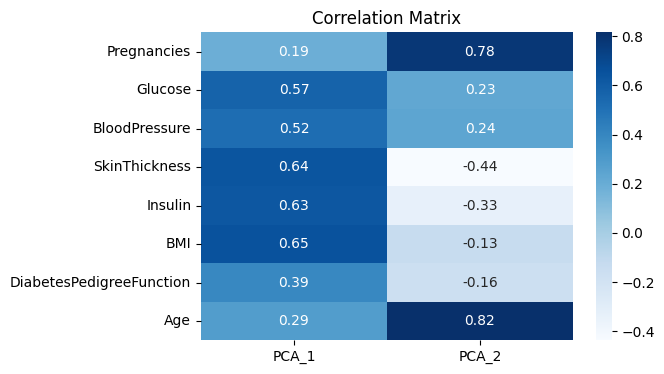

In [101]:
#Посмотрим корреляцию полученных компонент с исходными признаками, чтобы посмотреть, какие из них внесли наибольший вклад
first_component_corr = X.corrwith(PCA_dataset.PCA_1)
second_component_corr = X.corrwith(PCA_dataset.PCA_2)


corrs = pd.concat((first_component_corr, second_component_corr),
                  axis=1)

corrs.columns = ['PCA_1', 'PCA_2']

sns.heatmap(corrs, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

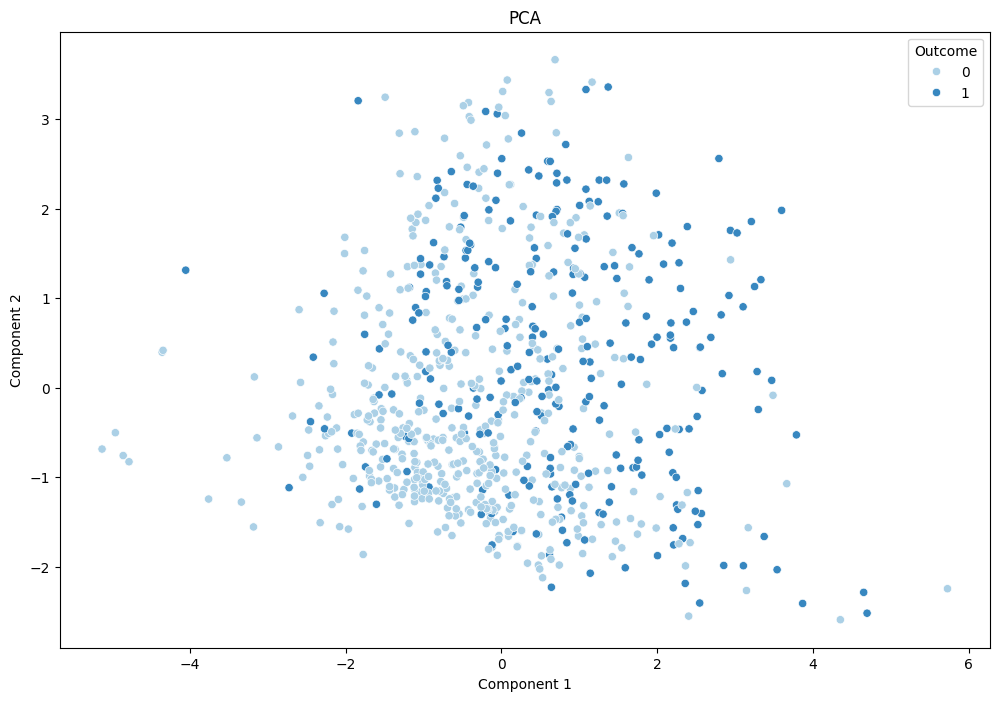

In [102]:
fig = plt.figure()
fig.set_size_inches(12, 8)

sns.scatterplot(data=PCA_dataset, x="PCA_1", y="PCA_2", hue=y, palette='Blues')

plt.title('PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.show()

####LDA

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [104]:
'''
Указываем число компонент равным единице, так как число компонент это минимум
из количества признаков и количества классов за вычетом единицы, а у нас всего
два класса
'''
lda = LinearDiscriminantAnalysis(n_components = 1)

LDA_dataset = lda.fit_transform(X_transformed, y)

LDA_dataset = pd.DataFrame(LDA_dataset, columns=['Comp_1'])

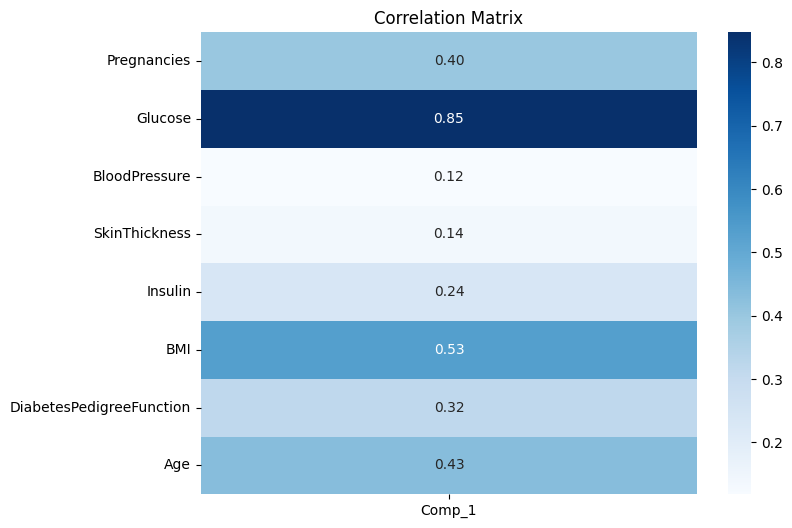

In [105]:
lda_component_corr = X.corrwith(LDA_dataset.Comp_1)

corrs_lda = pd.DataFrame(lda_component_corr, columns=['Comp_1'])

plt.figure(figsize=(8, 6))
sns.heatmap(corrs_lda, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

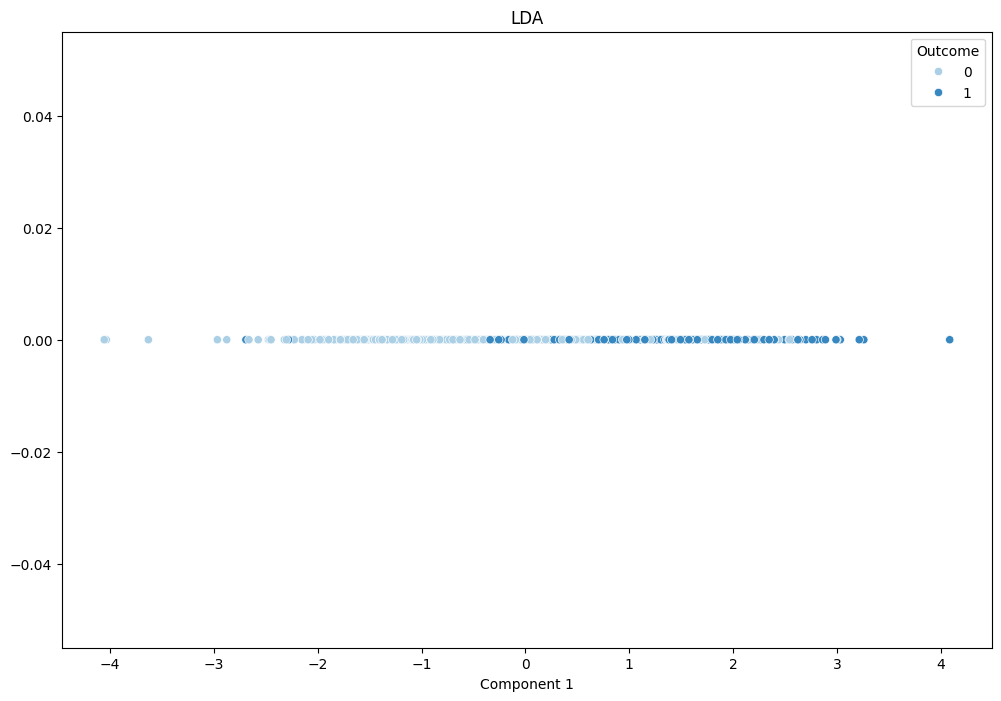

In [106]:
fig = plt.figure()
fig.set_size_inches(12, 8)
sns.scatterplot(data=LDA_dataset, x="Comp_1", y=[0]*len(LDA_dataset), hue=y, palette='Blues')

plt.title('LDA')
plt.xlabel('Component 1')
plt.show()

####Truncated SVD

In [107]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)

SVD_dataset = svd.fit_transform(X_transformed)

SVD_dataset = pd.DataFrame(SVD_dataset, columns=['Comp_1', 'Comp_2'])

SVD_dataset.head()

,Comp_1,Comp_2
0,1.068503,1.234895
1,-1.121683,-0.733852
2,-0.396477,1.595876
3,-1.115781,-1.271241
4,2.359334,-2.184819


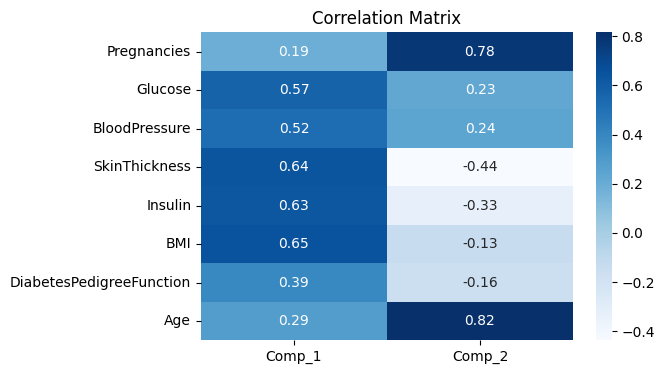

In [111]:
first_component_corr = X.corrwith(SVD_dataset.Comp_1)
second_component_corr = X.corrwith(SVD_dataset.Comp_2)


corrs = pd.concat((first_component_corr, second_component_corr),
                  axis=1)

corrs.columns = ['Comp_1', 'Comp_2']

sns.heatmap(corrs, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

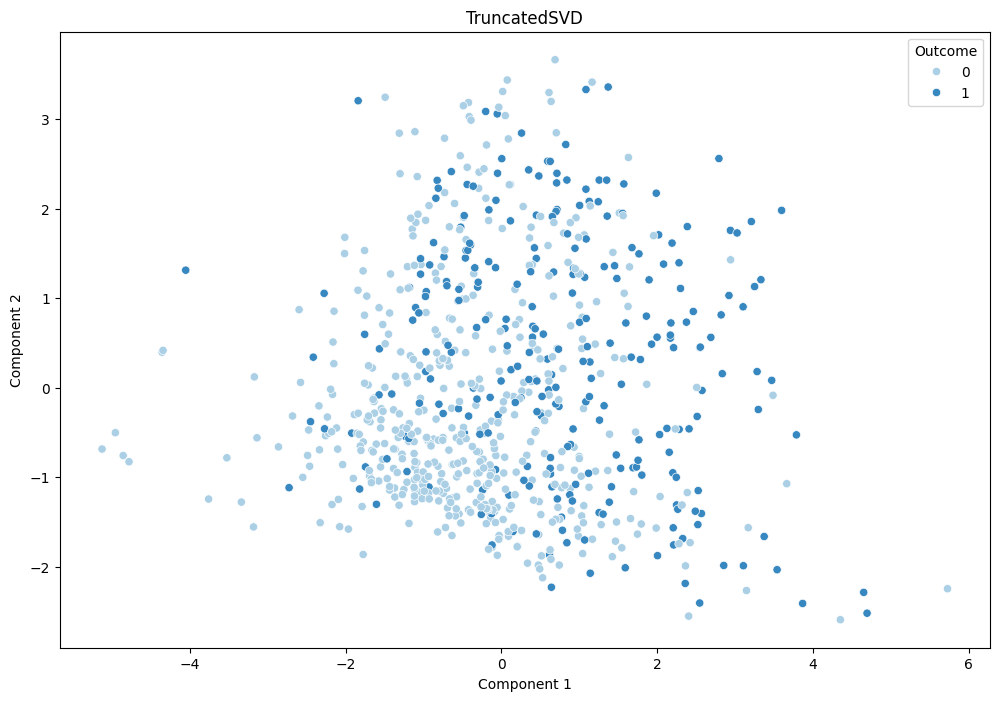

In [112]:
fig = plt.figure()
fig.set_size_inches(12, 8)

sns.scatterplot(data=SVD_dataset, x="Comp_1", y="Comp_2", hue=y, palette='Blues')

plt.title('TruncatedSVD')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.show()

####KernelPCA

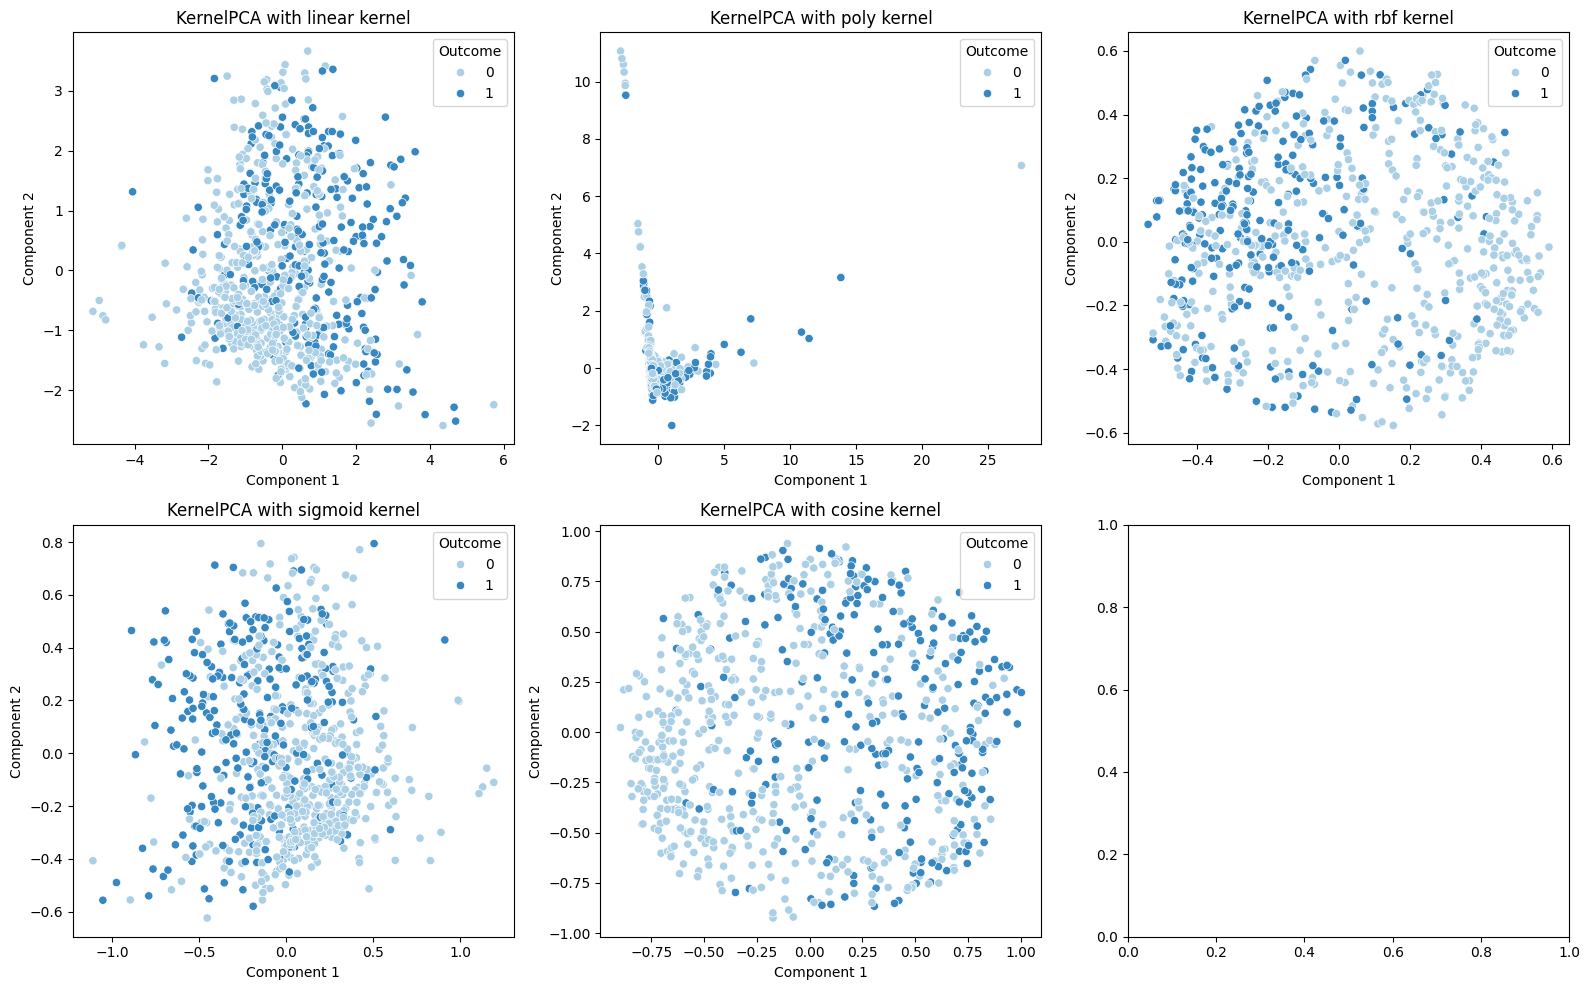

In [113]:
from sklearn.decomposition import KernelPCA

kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']
num_plots = len(kernels)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

for i, kernel in enumerate(kernels):
    row = i // 3
    col = i % 3

    kpca = KernelPCA(n_components=2, kernel=kernel)
    KPCA_dataset = kpca.fit_transform(X_transformed)
    KPCA_dataset = pd.DataFrame(KPCA_dataset, columns=['Comp_1', 'Comp_2'])

    ax = axes[row, col]
    sns.scatterplot(data=KPCA_dataset, x="Comp_1", y="Comp_2", hue=y, palette='Blues', ax=ax)

    ax.set_title(f'KernelPCA with {kernel} kernel')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')

plt.tight_layout()
plt.show()


In [114]:
from sklearn.metrics.pairwise import pairwise_kernels

K = pairwise_kernels(X, metric='cosine')

kpca = KernelPCA(n_components=2, kernel='precomputed')
KPCA_dataset = kpca.fit_transform(K)

KPCA_dataset = pd.DataFrame(KPCA_dataset, columns=['Comp_1', 'Comp_2'])

KPCA_dataset.head()


,Comp_1,Comp_2
0,-0.343978,-0.041653
1,-0.334590,0.153856
2,-0.349360,-0.230806
3,0.308362,0.081918
4,0.457627,-0.130783


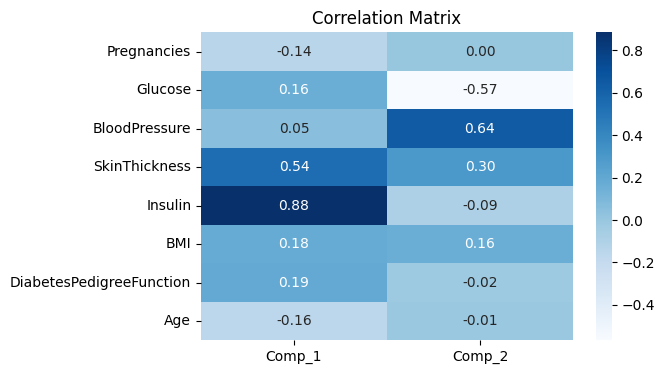

In [115]:
first_component_corr = X.corrwith(KPCA_dataset.Comp_1)
second_component_corr = X.corrwith(KPCA_dataset.Comp_2)


corrs = pd.concat((first_component_corr, second_component_corr),
                  axis=1)

corrs.columns = ['Comp_1', 'Comp_2']

sns.heatmap(corrs, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

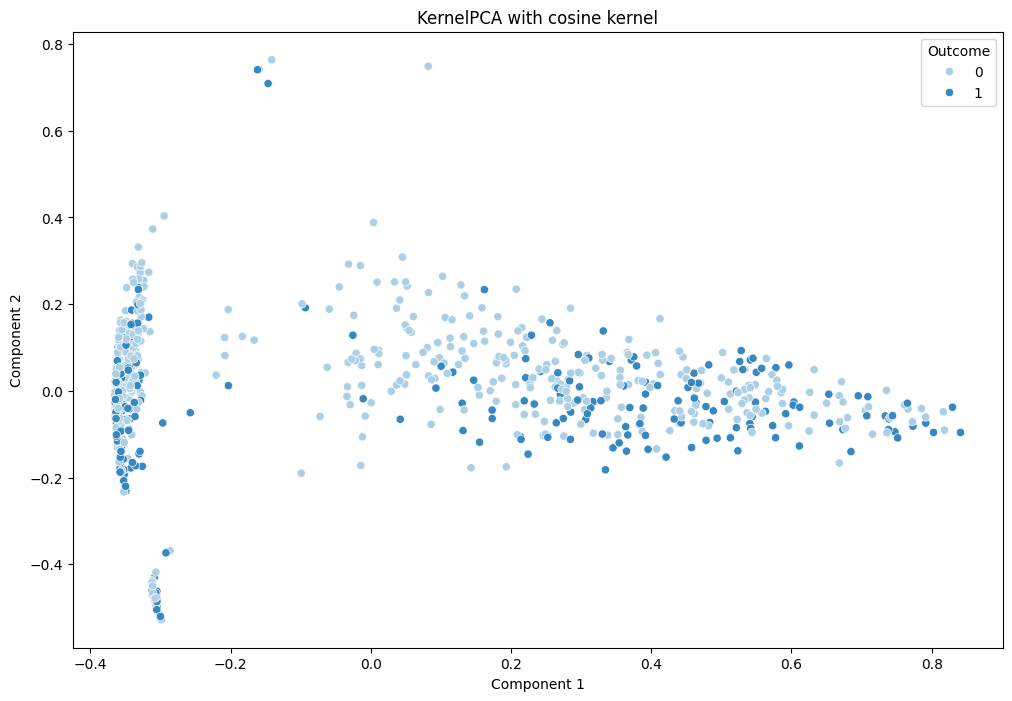

In [116]:
fig = plt.figure()
fig.set_size_inches(12, 8)

sns.scatterplot(data=KPCA_dataset, x="Comp_1", y="Comp_2", hue=y, palette='Blues')

plt.title('KernelPCA with cosine kernel')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.show()